# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [32]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [82]:
df = pd.read_csv('previsao_de_renda.csv')
print(df.isnull().sum())
df.dropna(subset=['tempo_emprego'],inplace=True)

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64


1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.

2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.

3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 
    

In [77]:
df.sample(5)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
11163,11163,2015-12-01,13721,F,False,False,1,Assalariado,Superior completo,Separado,Casa,38,0.367123,2.0,818.54
10052,10052,2015-11-01,4573,F,False,True,1,Assalariado,Superior completo,Casado,Casa,28,6.515068,3.0,3728.80
6169,6169,2015-07-01,490,M,False,False,1,Assalariado,Secundário,Solteiro,Casa,46,18.035616,2.0,9699.30
4498,4498,2015-05-01,15282,F,False,False,0,Pensionista,Secundário,Casado,Casa,61,NaN,2.0,3052.61
12287,12287,2016-01-01,11171,F,False,True,2,Assalariado,Superior completo,Casado,Casa,40,5.843836,4.0,3603.81


### 1. Ajuste do  modelo para prever log(renda) considerando todas as covariáveis disponíveis.

In [94]:
y, X = patsy.dmatrices('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda,Treatment(1)) + C(educacao,Treatment(2)) + C(estado_civil,Treatment(3)) +C(tipo_residencia,Treatment(2)) + idade + tempo_emprego + qt_pessoas_residencia ', df)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:01:23   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             6.7314      0.327     20.574      0.000       6.090       7.373
sexo[T.M]                                             0.7874      0.015     53.723      0.000       0.759       0.816
posse_de_veiculo[T.True]                              0.0441      0.014      3.119      0.002       0.016       0.072
posse_de_imovel[T.True]                               0.0829      0.014      5.926      0.000       0.055       0.110
C(tipo_renda, Treatment(1))[T.Assalariado]           -0.2209      0.241     -0.916      0.360      -0.694       0.252
C(tipo_renda, Treatment(1))[T.Empresário]            -0.0657      0.241     -0.272      0.785      -0.539       0.407
C(tipo_renda, Treatment(1))[T.Pensionista]           -0.5296      0.341     -1.553      0.120      -1.198       0.139
C(tipo_renda, Treatment(1))[T.Servidor público]      -0.1633      0.242     -0.675      0.500      -0.637       0.311
C(educacao, Treatment(2))[T.Primário]                 0.0141      0.072      0.196      0.844      -0.127       0.155
C(educacao, Treatment(2))[T.Pós graduação]            0.1212      0.142      0.853      0.394      -0.157       0.400
C(educacao, Treatment(2))[T.Superior completo]        0.1079      0.014      7.763      0.000       0.081       0.135
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0290      0.032     -0.900      0.368      -0.092       0.034
C(estado_civil, Treatment(3))[T.Casado]               0.0343      0.025      1.361      0.174      -0.015       0.084
C(estado_civil, Treatment(3))[T.Separado]             0.3607      0.113      3.182      0.001       0.138       0.583
C(estado_civil, Treatment(3))[T.Solteiro]             0.3015      0.111      2.714      0.007       0.084       0.519
C(estado_civil, Treatment(3))[T.Viúvo]                0.4032      0.118      3.425      0.001       0.172       0.634
C(tipo_residencia, Treatment(2))[T.Aluguel]           0.0258      0.060      0.427      0.670      -0.093       0.144
C(tipo_residencia, Treatment(2))[T.Casa]             -0.0184      0.029     -0.625      0.532      -0.076       0.039
C(tipo_residencia, Treatment(2))[T.Comunitário]      -0.0938      0.095     -0.988      0.323      -0.280       0.092
C(tipo_residencia, Treatment(2))[T.Estúdio]           0.0923      0.088      1.044      0.296      -0.081       0.265
C(tipo_residencia, Treatment(2))[T.Governamental]    -0.0313      0.048     -0.658      0.511      -0.125       0.062
qtd_filhos                                           -0.2658      0.108     -2.463      0.014      -0.477      -0.054
idade                                                 0.0053      0.001      6.624      0.000       0.004       0.007
tempo_emprego  

### Removendo a variável menos significante: educacao

In [97]:
y, X = patsy.dmatrices('np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda,Treatment(1)) +  C(estado_civil,Treatment(3)) +C(tipo_residencia,Treatment(2)) + idade + tempo_emprego + qt_pessoas_residencia +  1', df)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     340.0
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:03:16   Log-Likelihood:                -13601.
No. Observations:               12427   AIC:                         2.724e+04
Df Residuals:                   12406   BIC:                         2.740e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             6.8699      0.327     20.986      0.000       6.228       7.512
C(sexo)[T.M]                                          0.7800      0.015     53.208      0.000       0.751       0.809
posse_de_veiculo[T.True]                              0.0533      0.014      3.769      0.000       0.026       0.081
posse_de_imovel[T.True]                               0.0856      0.014      6.110      0.000       0.058       0.113
C(tipo_renda, Treatment(1))[T.Assalariado]           -0.2988      0.242     -1.237      0.216      -0.772       0.175
C(tipo_renda, Treatment(1))[T.Empresário]            -0.1337      0.242     -0.553      0.580      -0.608       0.340
C(tipo_renda, Treatment(1))[T.Pensionista]           -0.5501      0.342     -1.609      0.108      -1.220       0.120
C(tipo_renda, Treatment(1))[T.Servidor público]      -0.2235      0.242     -0.922      0.356      -0.698       0.251
C(estado_civil, Treatment(3))[T.Casado]               0.0374      0.025      1.481      0.139      -0.012       0.087
C(estado_civil, Treatment(3))[T.Separado]             0.3611      0.114      3.177      0.001       0.138       0.584
C(estado_civil, Treatment(3))[T.Solteiro]             0.2990      0.111      2.685      0.007       0.081       0.517
C(estado_civil, Treatment(3))[T.Viúvo]                0.3975      0.118      3.368      0.001       0.166       0.629
C(tipo_residencia, Treatment(2))[T.Aluguel]           0.0184      0.061      0.304      0.761      -0.100       0.137
C(tipo_residencia, Treatment(2))[T.Casa]             -0.0185      0.029     -0.627      0.530      -0.076       0.039
C(tipo_residencia, Treatment(2))[T.Comunitário]      -0.0588      0.095     -0.619      0.536      -0.245       0.127
C(tipo_residencia, Treatment(2))[T.Estúdio]           0.1039      0.089      1.174      0.240      -0.070       0.278
C(tipo_residencia, Treatment(2))[T.Governamental]    -0.0394      0.048     -0.827      0.408      -0.133       0.054
qtd_filhos                                           -0.2567      0.108     -2.372      0.018      -0.469      -0.045
idade                                                 0.0049      0.001      6.185      0.000       0.003       0.006
tempo_emprego                                         0.0617      0.001     59.327      0.000       0.060       0.064
qt_pessoas_residencia                                 0.2846      0.108      2.634      0.008       0.073       0.496
==============================================================================
Omnibus:                        1.217   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                1.187
Skew:         

#### Observações:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.


Comparando-se os dois modelos onde:
- Modelo 1 - foram consideradas todas a variáveis;
- Modelo 2 - eliminou-se a variável menos relevante (educacao).

Observa-se uma ligeira piora no modelo com a redução do valor de R² e do R² ajustado.
O AIC sofreu ainda uma discreta elevação indicando uma piora do modelo.

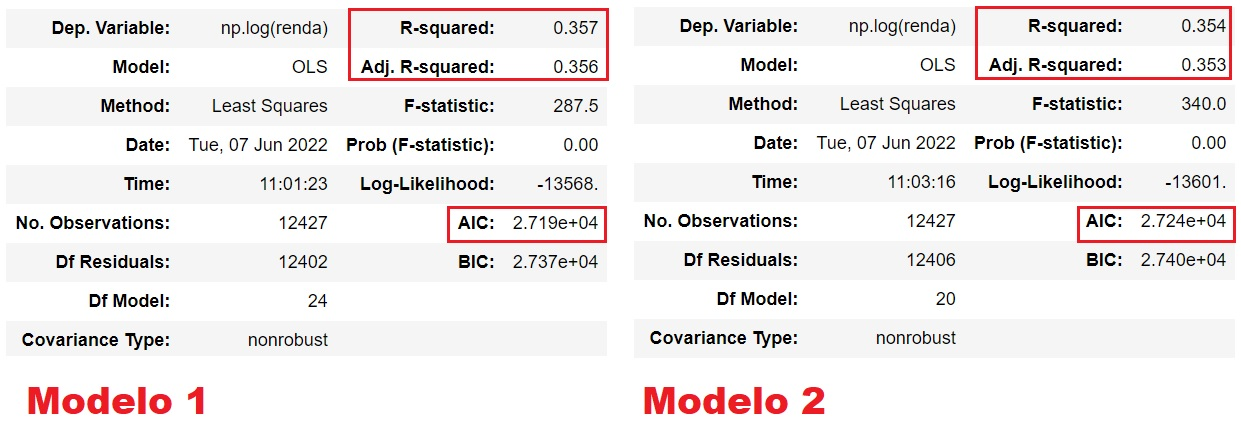

### Removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. 
- Compare o modelo final com o inicial. 
- Observe os indicadores e conclua se o modelo parece melhor.

In [103]:
y, X = patsy.dmatrices('np.log(renda) ~ sexo + posse_de_veiculo + idade + tempo_emprego ', df)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     1628.
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:28:25   Log-Likelihood:                -13697.
No. Observations:               12427   AIC:                         2.740e+04
Df Residuals:                   12422   BIC:                         2.744e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.2956      0.031    234.678      0.000       7.235       7.357
sexo[T.M]                    0.7664      0.015     52.560      0.000       0.738       0.795
posse_de_veiculo[T.True]     0.0608      0.014      4.318      0.000       0.033       0.088
idade                        0.0048      0.001      6.491      0.000       0.003       0.006
tempo_emprego                0.0609      0.001     58.968      0.000       0.059       0.063
==============================================================================
Omnibus:                        0.905   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.636   Jarque-Bera (JB):                0.881
Skew:                           0.019   Prob(JB):                        0.644
Kurtosis:                       3.016   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusão
Embora bastante simplificado, o Modelo 3 apresentou uma ligeira piora no R², R² ajustado e AIC em comparação aos dois modelos anteriores.
Apesar disso, dada a sua simplicidade em consequencia do reduzido número de variáveis e do afastamento do risco de overfiting, o modelo 3 poderá ser adotado sem maiores prejuízos para explicação da variável "log de renda".

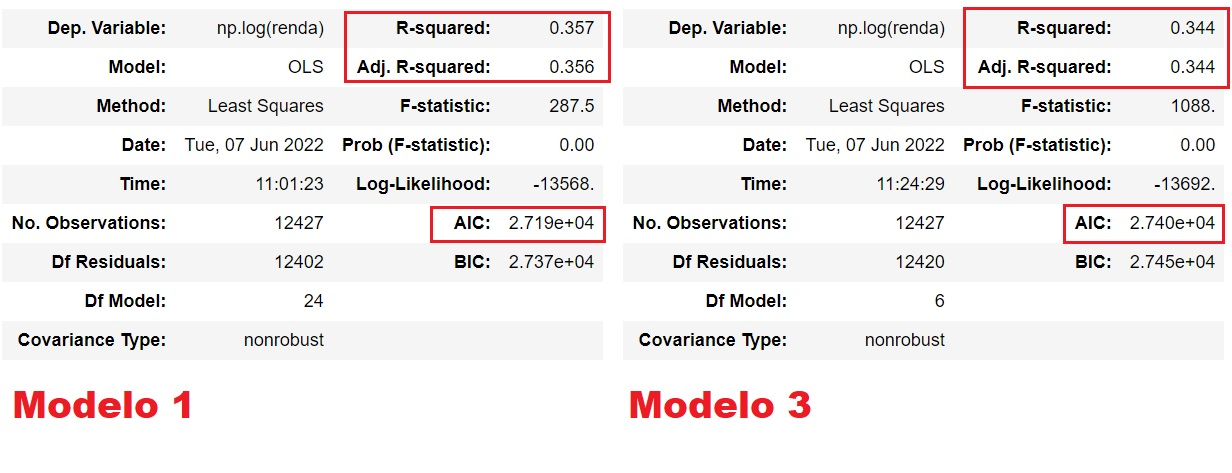